# Gross-Pitaevskii equation with external magnetic field

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.130178e+01     8.014826e+00
 * time: 0.005897998809814453
     1     2.828728e+01     5.320449e+00
 * time: 0.016494035720825195
     2     2.005612e+01     5.322599e+00
 * time: 0.041748046875
     3     1.300135e+01     1.332457e+00
 * time: 0.07163119316101074
     4     1.232573e+01     2.532088e+00
 * time: 0.08967208862304688
     5     1.177711e+01     1.442523e+00
 * time: 0.22458314895629883
     6     1.074075e+01     1.689926e+00
 * time: 0.24178218841552734
     7     9.888960e+00     9.968879e-01
 * time: 0.2584340572357178
     8     9.480048e+00     9.595463e-01
 * time: 0.2755119800567627
     9     9.284641e+00     7.337973e-01
 * time: 0.2962222099304199
    10     9.100300e+00     4.052122e-01
 * time: 0.31276607513427734
    11     8.984216e+00     7.383481e-01
 * time: 0.32634401321411133
    12     8.886353e+00     5.949094e-01
 * time: 0.339292049407959
    13     8.832384e+00     5.538548e-01
 * time: 0.35220

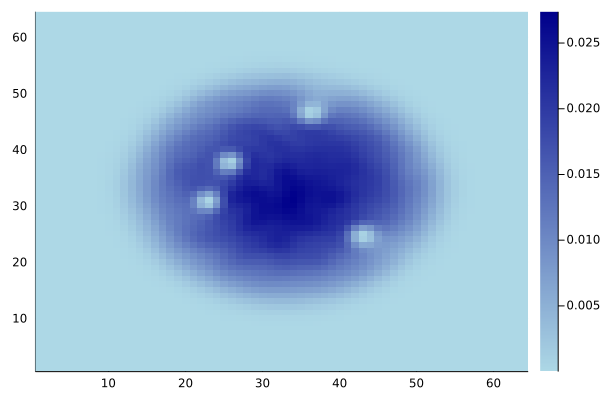

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         LocalNonlinearity(ρ -> C * ρ^α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)